# SIR, SEIR and SEIRC examples

See wikipedia for descriptions of SIR and SEIR: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

SEIRC is a modification of SEIR which includes rudimentary clinical estimates. Description is below. 

In [1]:
#import sys
#sys.path.append("your/path/to/epipy")

import importlib
import sir as sir
importlib.reload(sir)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# useful function for plots

def plotStuff(model, keys, title = 'results', normal = True, xlabel = 'days', ylabel = 'cases'):
    """given a model plots time dependence of results listed in keys array."""
    for key in keys:
        if normal:
            plt.plot(model.result['time'], model.result[key], label = key)
        else:
            plt.semilogy(model.result['time'], model.result[key], label = key)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# SIR - no intervention, R = 3, T_inf = 3

Run a simulation and plot numbers of cases in normal and log scale. 

The rate of the initial exponential growth is controlled by R/T_inf: bigger R and shorter T_inf make the disease spread faster.

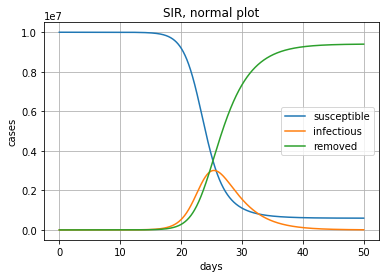

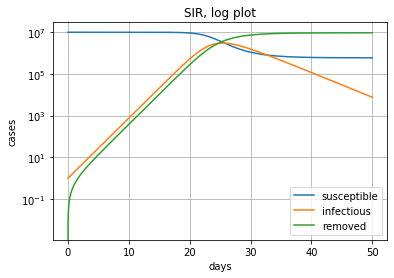

In [3]:
# simulation and plots

# parameters
par = {'N': 10e6, # total population
       'I0' : 1, # number of initial infected individuals
       'R' : 3, #reproduction number
       'T_inf' : 3, # infectious time - no symptoms, infectious
       'intervention' : False, # do we do an intervention
       'R_intervention' : [0.7, 1.3], # R during intervention intervals
       'intervention_intervals' : [[50,100], [100,600]], # during which time intervals we do the intervention [start, stop]
       'start_day' : 0, # first day of the outbreak - change this to shift time axis of the simulation
       'duration' : 50 # duration of the simulation
       }

# simulation
model = sir.SIR(par)
model.simulate(dt = 0.01)

# plots
keys = ['susceptible', 'infectious', 'removed']
plotStuff(model, keys, 'SIR, normal plot')
plotStuff(model, keys, 'SIR, log plot', normal = False)

# SIR - strong intervention on day 10, partialy lifted on day 50, re-introduced on day 140

The same simulation as above, but we change R to limit the spread of the diseasse.

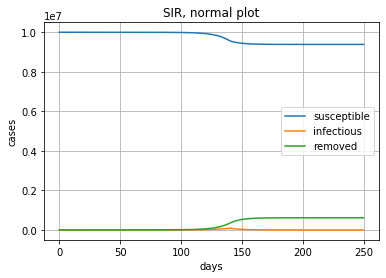

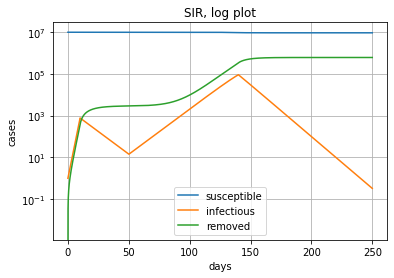

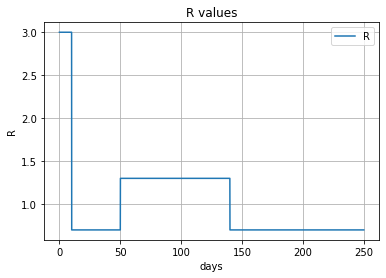

In [4]:
# simulation and plots

# parameters
par = {'N': 10e6, # total population
       'I0' : 1, # number of initial infected individuals
       'R' : 3, #reproduction number
       'T_inf' : 3, # infectious time - no symptoms, infectious
       'intervention' : True, # do we do an intervention
       'R_intervention' : [0.7, 1.3, 0.7], # R during intervention intervals
       'intervention_intervals' : [[10,50], [50,140], [140, 600]], # during which time intervals we do the intervention [start, stop]
       'start_day' : 0, # first day of the outbreak - change this to shift time axis of the simulation
       'duration' : 250 # duration of the simulation
       }

# simulation
model = sir.SIR(par)
model.simulate(dt = 0.01)

# plots
keys = ['susceptible', 'infectious', 'removed']
plotStuff(model, keys, 'SIR, normal plot')
plotStuff(model, keys, 'SIR, log plot', normal = False)

keys = ['R']
plotStuff(model, keys, 'R values', ylabel = 'R')

# SEIR - no intervention, R = 3, T_inc = 3, T_inf = 4

Note that despite having the same R as the SIR example above the infection spreads more slowly. This is due to longer incubation and infection times T_inc and T_inf.

In [5]:
import seir as seir
importlib.reload(seir)

<module 'seir' from '/Users/karel/software/epipy/seir.py'>

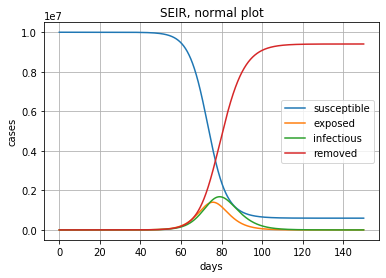

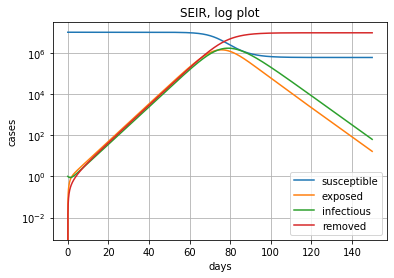

In [6]:
#parameters
par = {'N': 10e6, # total population
       'I0' : 1, # number of initial infected individuals
       'R' : 3, #reproduction number
       'T_inc' : 3, # incubation time - no symptoms, not infectious
       'T_inf' : 4, # infectious time - no symptoms, infectious
       'intervention' : False, # do we do an intervention
       'R_intervention' : [0.7, 1.3], # R during intervention intervals
       'intervention_intervals' : [[50,300], [300,600]], # during which time intervals we do the intervention [start, stop]
       'start_day' : 0, # first day of the outbreak - change this to shift time axis of the simulation
       'duration' : 150 # duration of the simulation
       }

#simulation
model = seir.SEIR(par)
model.simulate()

#plots
keys = ['susceptible', 'exposed','infectious', 'removed']
plotStuff(model, keys, 'SEIR, normal plot')
plotStuff(model, keys, 'SEIR, log plot', normal = False)

# SEIRC

Same as the SEIR above but now with clinical estimates.

In [7]:
import seirc as seirc
importlib.reload(seirc)

<module 'seirc' from '/Users/karel/software/epipy/seirc.py'>

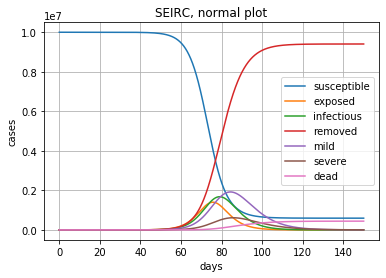

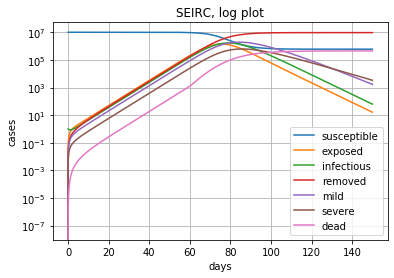

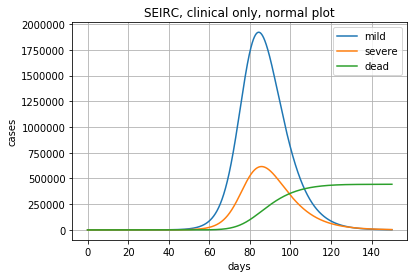

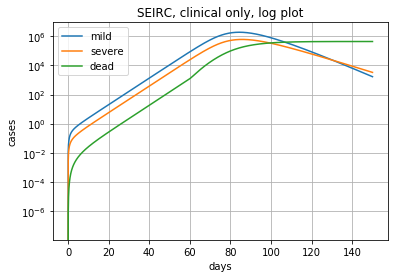

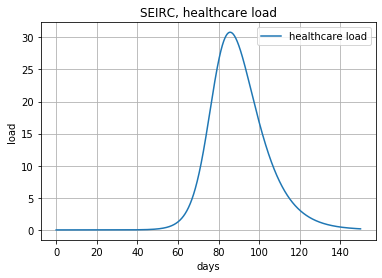

In [8]:
#parameters
par = {'N': 10e6, # total population
       'I0' : 1, # number of initial infected individuals
       'R' : 3, #reproduction number
       'T_inc' : 3, # incubation time - no symptoms, not infectious
       'T_inf' : 4, # infectious time - no symptoms, infectious
       'T_mild' : 7, # recovery time for mild cases
       'T_severe' : 10, # recovery time for severe cases
       'p_mild' : 0.8, # probability of a mild case
       'p_fatal' : 0.02, # fatality rate
        'p_fatal_overrun' : 0.05, # fatality rate in an overrun healthcare system
       'healthcare_capacity' : 20e3, # maximum number of severe cases that the healthcare system can handle
       'intervention' : False, # do we do an intervention
       'R_intervention' : [0.7, 1.3], # R during intervention intervals
       'intervention_intervals' : [[50,300], [300,600]], # during which time intervals we do the intervention [start, stop]
       'start_day' : 0, # first day of the outbreak - change this to shift time axis of the simulation
       'duration' : 150 # duration of the simulation
       }


#simulation
model = seirc.SEIRC(par)
model.simulate()

# plots
keys = ['susceptible', 'exposed', 'infectious', 'removed', 'mild', 'severe', 'dead']
plotStuff(model, keys, 'SEIRC, normal plot')
plotStuff(model, keys, 'SEIRC, log plot', normal = False)

# clinical only
keys = ['mild', 'severe', 'dead']
plotStuff(model, keys, 'SEIRC, clinical only, normal plot')
plotStuff(model, keys, 'SEIRC, clinical only, log plot', normal = False)

# healthcare load
keys = ['healthcare load']
plotStuff(model, keys, 'SEIRC, healthcare load', ylabel = 'load')

# SEIRC - strong intervention on day 50, partialy lifted on day 100

The same simulation as above, but we change R to limit the spread of the diseasse and increase the duration of the simulation.

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


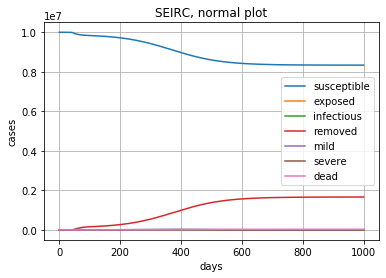

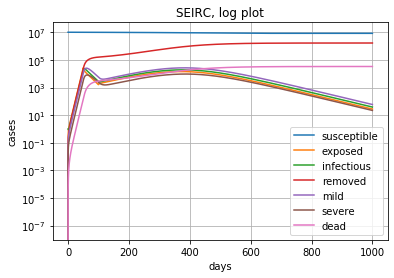

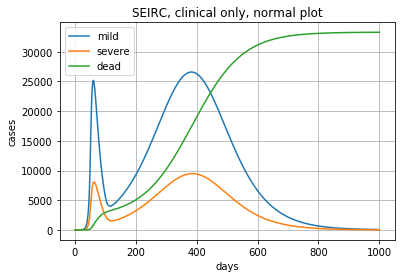

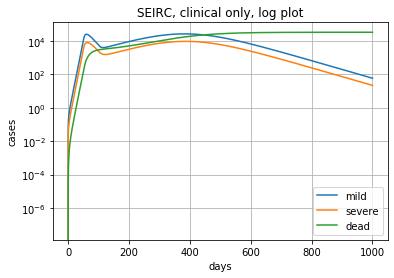

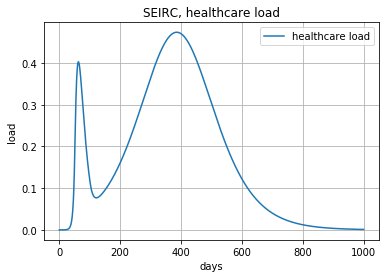

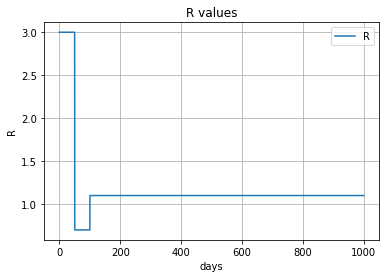

In [9]:
#parameters
par = {'N': 10e6, # total population
       'I0' : 1, # number of initial infected individuals
       'R' : 3, #reproduction number
       'T_inc' : 3, # incubation time - no symptoms, not infectious
       'T_inf' : 4, # infectious time - no symptoms, infectious
       'T_mild' : 7, # recovery time for mild cases
       'T_severe' : 10, # recovery time for severe cases
       'p_mild' : 0.8, # probability of a mild case
       'p_fatal' : 0.02, # fatality rate
        'p_fatal_overrun' : 0.05, # fatality rate in an overrun healthcare system
       'healthcare_capacity' : 20e3, # maximum number of severe cases that the healthcare system can handle
       'intervention' : True, # do we do an intervention
       'R_intervention' : [0.7, 1.1], # R during intervention intervals
       'intervention_intervals' : [[50,100], [100,1000]], # during which time intervals we do the intervention [start, stop]
       'start_day' : 0, # first day of the outbreak - change this to shift time axis of the simulation
       'duration' : 1000 # duration of the simulation
       }


#simulation
model = seirc.SEIRC(par)
model.simulate()

# plots
keys = ['susceptible', 'exposed', 'infectious', 'removed', 'mild', 'severe', 'dead']
plotStuff(model, keys, 'SEIRC, normal plot')
plotStuff(model, keys, 'SEIRC, log plot', normal = False)

# clinical only
keys = ['mild', 'severe', 'dead']
plotStuff(model, keys, 'SEIRC, clinical only, normal plot')
plotStuff(model, keys, 'SEIRC, clinical only, log plot', normal = False)

# healthcare load
keys = ['healthcare load']
plotStuff(model, keys, 'SEIRC, healthcare load', ylabel = 'load')

# reproduction number
keys = ['R']
plotStuff(model, keys, 'R values', ylabel = 'R')